In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = "/nba_logreg.csv"

In [71]:
data = pd.read_csv("/content/drive/MyDrive/DATA SCIENCE/NBA Logistic regression analysis/nba_logreg.csv")
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [72]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving NBA DESCRIPTION.png to NBA DESCRIPTION.png


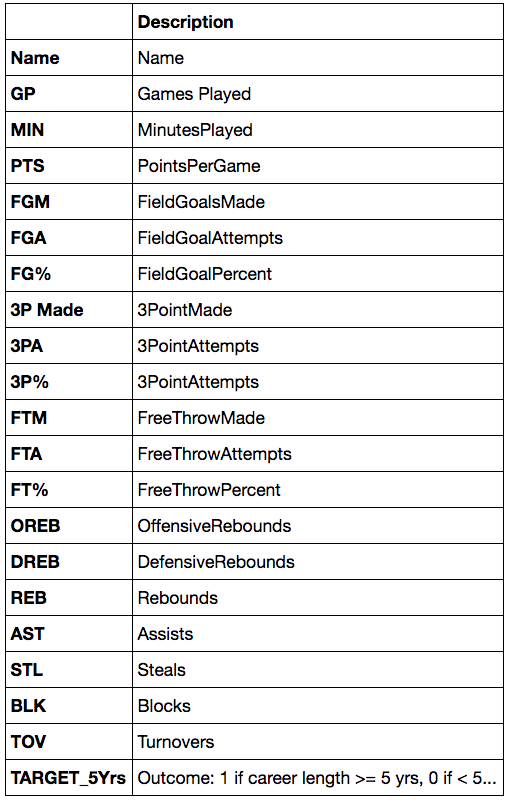

In [ ]:
Image("NBA DESCRIPTION.png", width=400)

1. GP  - Games played
2. MIN  - minutes played
3. PTS - points per game
4. FGM  - field goals made 
5. FGA   - field goal attempts
6. FG%   - field goal percentage
7. 3P MADE - 3point made
8. 3PA  - 3points attempt
9. FTM   - free throw made
10. FTA  - free throw attempts
11. FT%   - free throw percentage
12. OREB - offensive rebounds
DREB - defensive rebounds
13. REB  - rebounds
14. AST  - assits
15. STL  - steals
16. BLK -- blocks
17. TOV -- turnovers

In [73]:
data.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [75]:
data.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [76]:
data.drop("Name",axis=1,inplace=True)

**DEALING WITH MISSING ENTRIES(IMPURATION)**

we have missing values in column 3PA 

In [77]:
updated_df = data
updated_df['3P%']=updated_df['3P%'].fillna(updated_df['3P%'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GP           1340 non-null   int64  
 1   MIN          1340 non-null   float64
 2   PTS          1340 non-null   float64
 3   FGM          1340 non-null   float64
 4   FGA          1340 non-null   float64
 5   FG%          1340 non-null   float64
 6   3P Made      1340 non-null   float64
 7   3PA          1340 non-null   float64
 8   3P%          1340 non-null   float64
 9   FTM          1340 non-null   float64
 10  FTA          1340 non-null   float64
 11  FT%          1340 non-null   float64
 12  OREB         1340 non-null   float64
 13  DREB         1340 non-null   float64
 14  REB          1340 non-null   float64
 15  AST          1340 non-null   float64
 16  STL          1340 non-null   float64
 17  BLK          1340 non-null   float64
 18  TOV          1340 non-null   float64
 19  TARGET

In [78]:
updated_df.isnull().sum()

GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

# Data Exploration

In [79]:
count = updated_df['TARGET_5Yrs']
data_distrubution = count.value_counts()

1.0    831
0.0    509
Name: TARGET_5Yrs, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


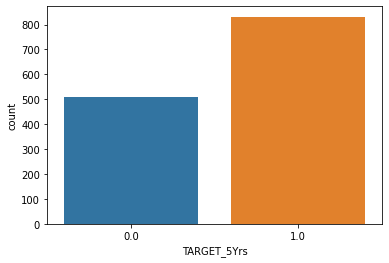

In [80]:
# plot distrubution of the variable TARGET_5yrs
print(data_distrubution)
sns.countplot(count)


The first binary classification dataset in the list requires you to predict if a rookie basketball player will last more than 5 years in the league:

In [81]:
updated_df.groupby('TARGET_5Yrs').mean()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
TARGET_5Yrs,,,,,,,,,,,,,,,,,,,
0.0,51.577603,14.252259,5.042829,1.946169,4.542043,42.388802,0.229666,0.754617,19.377306,0.923379,1.321611,68.858546,0.718271,1.531238,2.247544,1.221022,0.498232,0.253438,0.942240
1.0,65.826715,19.690253,7.878700,3.047413,6.708063,45.260048,0.258604,0.794224,19.265753,1.526955,2.128400,71.183394,1.187726,2.328640,3.516486,1.752347,0.692178,0.439110,1.347533


1. GP  - Games played
2. MIN  - minutes played
3. PTS - points per game
4. FGM  - field goals made 
5. FGA   - field goal attempts
6. FG%   - field goal percentage
7. 3P MADE - 3point made
8. 3PA  - 3points attempt
9. FTM   - free throw made
10. FTA  - free throw attempts
11. FT%   - free throw percentage
12. OREB - offensive rebounds
DREB - defensive rebounds
13. REB  - rebounds
14. AST  - assits
15. STL  - steals
16. BLK -- blocks
17. TOV -- turnovers

The logistic regression assumes a linear relationship amoung'st independent variables.

*   The response variable must follow a binomial distribution.(1 or 0 , yes/ no , true / false)
*   lets plot indipendent variables againts each other for further analysis



DATA VISUALIZATION

In [82]:
updated_df.head()

            
                 

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


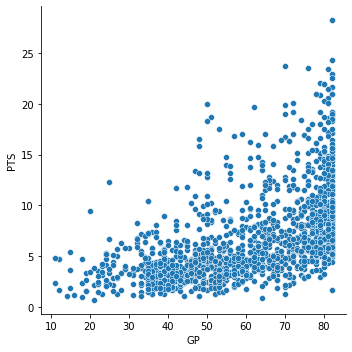

In [83]:
#games played vs points made
sns.relplot(x="GP", y= "PTS", data=updated_df)

**OUTLIERS : DETECT AND REMOVE**

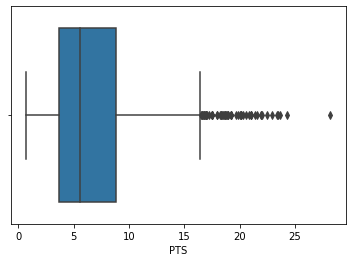

In [84]:
# OUTLIERS IN PTS
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=updated_df['PTS'])

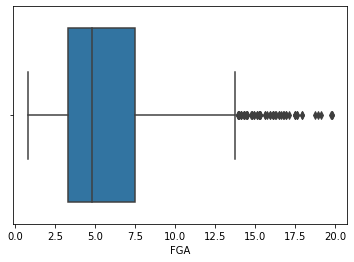

In [85]:
#OUTLIERS IN FGA
sns.boxplot(x=updated_df['FGA'])

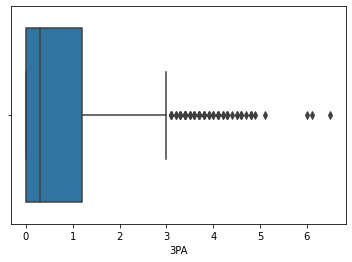

In [86]:
#OUTLIERS IN COLUMN 3PA
sns.boxplot(x = updated_df['3PA'])

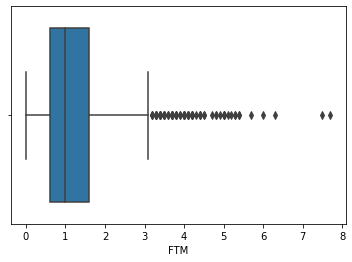

In [87]:
sns.boxplot(x = updated_df['FTM'])

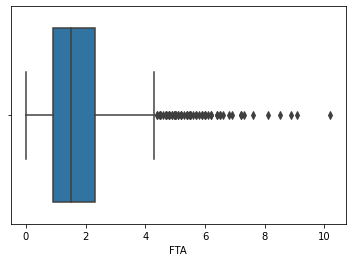

In [88]:
sns.boxplot(x = updated_df['FTA'])

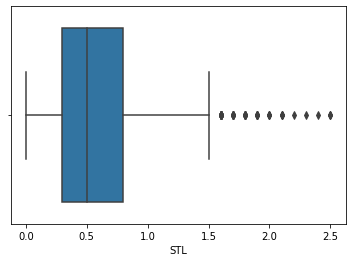

In [89]:
sns.boxplot(x = updated_df['STL'])

# **Z-SCORE IMPLEMENTATION**

In [90]:
from scipy import stats
zscore = np.abs(stats.zscore(updated_df))
print(zscore)

[[1.40090082 1.17706613 0.13740097 ... 0.07325418 0.14733795 1.27773744]
 [1.45828144 1.11686044 0.09148643 ... 0.30641476 0.56269458 1.27773744]
 [0.77956287 0.27991152 0.36765896 ... 0.1599064  0.26801868 1.27773744]
 ...
 [0.99923645 0.66522792 0.32174442 ... 0.07325418 0.40647089 1.27773744]
 [0.48281084 0.67726906 0.52835985 ... 0.62622755 0.5449231  0.7826334 ]
 [0.76971396 0.71339247 0.55131712 ... 0.62622755 0.40647089 0.7826334 ]]


In [91]:
threshold = 3
print(np.where(zscore > 3))

(array([  12,   18,   18,   18,   19,   19,   19,   22,   45,   61,   63,
         65,   65,   65,   65,   65,   67,   67,   68,   68,   69,   76,
        118,  118,  118,  118,  118,  118,  118,  118,  120,  120,  121,
        121,  123,  124,  150,  150,  150,  172,  172,  177,  181,  181,
        181,  181,  181,  181,  182,  182,  187,  190,  190,  190,  212,
        236,  236,  237,  240,  272,  272,  272,  272,  272,  272,  272,
        273,  273,  274,  275,  276,  301,  303,  314,  314,  314,  314,
        314,  314,  314,  315,  316,  316,  318,  352,  352,  352,  352,
        352,  352,  352,  354,  400,  400,  400,  400,  400,  400,  400,
        400,  402,  402,  409,  441,  442,  442,  442,  442,  442,  442,
        442,  443,  443,  443,  443,  443,  443,  458,  485,  490,  490,
        490,  490,  490,  491,  491,  491,  492,  492,  492,  492,  494,
        494,  494,  496,  497,  497,  536,  537,  537,  537,  538,  538,
        538,  540,  545,  555,  585,  585,  585,  

# REMOVING OUTLIERS

In [92]:
clean_df = updated_df
clean_df = clean_df[(zscore < 3).all(axis=1)]

In [93]:
#shape before z-score
updated_df.shape

(1340, 20)

In [94]:
#shape after z-score
clean_df.shape

(1182, 20)

In [95]:
x = clean_df.iloc[:,0:19]# splitting the variables from the target
y = clean_df.iloc[:, -1]# separating target from other variables

# Scalling the data

In [96]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features

In [97]:
x

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0.352113,0.654494,0.372222,0.319444,0.444444,0.222543,0.384615,0.552632,0.374813,0.365854,0.392857,0.500000,0.212121,0.551724,0.431818,0.327586,0.222222,0.2500,0.37500
1,0.338028,0.640449,0.361111,0.236111,0.385621,0.075145,0.538462,0.736842,0.352324,0.609756,0.589286,0.609635,0.151515,0.310345,0.238636,0.637931,0.611111,0.3125,0.46875
2,0.887324,0.314607,0.250000,0.236111,0.254902,0.439306,0.307692,0.447368,0.365817,0.195122,0.214286,0.451827,0.151515,0.258621,0.215909,0.172414,0.277778,0.1875,0.28125
3,0.661972,0.210674,0.277778,0.277778,0.307190,0.450867,0.076923,0.131579,0.338831,0.195122,0.214286,0.483389,0.303030,0.120690,0.181818,0.137931,0.333333,0.0625,0.28125
4,0.521127,0.207865,0.211111,0.180556,0.143791,0.734104,0.000000,0.026316,0.000000,0.292683,0.321429,0.458472,0.303030,0.224138,0.250000,0.051724,0.166667,0.2500,0.21875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,0.971831,0.328652,0.200000,0.180556,0.183007,0.471098,0.000000,0.052632,0.214393,0.268293,0.250000,0.654485,0.121212,0.103448,0.102273,0.431034,0.333333,0.1250,0.21875
1178,0.802817,0.238764,0.177778,0.166667,0.215686,0.254335,0.076923,0.184211,0.250375,0.170732,0.160714,0.657807,0.121212,0.155172,0.136364,0.396552,0.444444,0.0000,0.37500
1179,0.450704,0.224719,0.261111,0.263889,0.202614,0.809249,0.000000,0.000000,0.000000,0.219512,0.267857,0.406977,0.454545,0.362069,0.397727,0.051724,0.166667,0.2500,0.25000
1180,0.577465,0.221910,0.211111,0.194444,0.196078,0.488439,0.000000,0.052632,0.149925,0.268293,0.303571,0.377076,0.060606,0.034483,0.045455,0.379310,0.222222,0.0625,0.21875


# Splitting train and test sest

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train ,x_test , y_train ,y_test = train_test_split(x, y, train_size= 0.90, random_state=1)

# MODEL DEVELOPMENT

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [102]:
model.fit(x_train , y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [103]:
predicted = model.predict(x_test)

In [104]:
#model_proba
model.predict_proba(x_test)

array([[0.16127073, 0.83872927],
       [0.39742412, 0.60257588],
       [0.50578835, 0.49421165],
       [0.15005342, 0.84994658],
       [0.68539753, 0.31460247],
       [0.62272268, 0.37727732],
       [0.51924455, 0.48075545],
       [0.58516199, 0.41483801],
       [0.79616521, 0.20383479],
       [0.56264158, 0.43735842],
       [0.35844056, 0.64155944],
       [0.48015856, 0.51984144],
       [0.25724767, 0.74275233],
       [0.13605346, 0.86394654],
       [0.48510954, 0.51489046],
       [0.15398751, 0.84601249],
       [0.48820036, 0.51179964],
       [0.5060349 , 0.4939651 ],
       [0.25817807, 0.74182193],
       [0.39533046, 0.60466954],
       [0.16302396, 0.83697604],
       [0.43228608, 0.56771392],
       [0.28487706, 0.71512294],
       [0.37934967, 0.62065033],
       [0.12183261, 0.87816739],
       [0.48295067, 0.51704933],
       [0.22084779, 0.77915221],
       [0.24711205, 0.75288795],
       [0.12690978, 0.87309022],
       [0.45745296, 0.54254704],
       [0.

In [105]:
#model score
model.score(x_test , y_test)

0.680672268907563

In [106]:
predicted

array([1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [107]:
y_test 

1029    1.0
337     0.0
1036    0.0
364     1.0
267     0.0
       ... 
971     1.0
539     1.0
942     1.0
23      0.0
389     0.0
Name: TARGET_5Yrs, Length: 119, dtype: float64

model.coef  indicates the value of m in y=mx + b equation

In [108]:
model.coef_

array([[ 2.32202944, -0.8623308 ,  0.52800428,  0.47354177,  0.16936705,
         0.23643497,  0.45565904, -0.92620168,  0.23956834,  0.56080371,
        -0.11478255,  0.64562029,  1.42405766, -0.33364435,  0.37091173,
         0.70492543,  0.11243224,  0.59798339, -0.4248919 ]])

# model.intercept_ indicates value of b in y=m*x + b equation

In [109]:
model.intercept_

array([-2.27796975])

# Lets defined sigmoid function now and do the math with hand

In [110]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


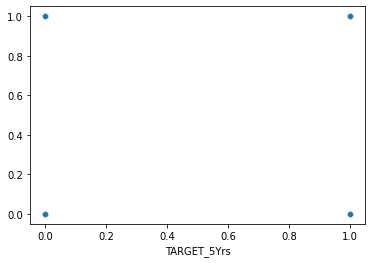

In [111]:
sns.scatterplot(y_test, predicted)

# IMPROVING THE MODEL WITH GRID SEARCH

In [62]:
#DEFINING GRID SEARCH PARAMETERS

In [112]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

In [113]:
#max_iter is the number of iterations.
#solver is the algorithm to use for optimization.
#class_weight is to troubleshoot unbalanced data sampling

In [114]:
#Hyperparameter Tune using Training Data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)


logModel_grid.fit(x_train, y_train)
print(logModel_grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234,
                   solver='liblinear')


In [116]:
#Predict on Testing Data

In [117]:
#applying grid search cv
y_pred = logModel_grid.predict(x_test)
print(y_pred)

[1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


In [118]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")

[[35 17]
 [25 42]] : is the confusion matrix 



In [120]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")

0.6470588235294118 : is the accuracy score


In [121]:
from sklearn.metrics import precision_score
print(precision_score(y_test, predicted), ": is the precision score")

0.6746987951807228 : is the precision score


In [122]:
from sklearn.metrics import recall_score
print(recall_score(y_test, predicted), ": is the recall score")

0.835820895522388 : is the recall score


In [123]:
from sklearn.metrics import f1_score
print(f1_score(y_test, predicted), ": is the f1 score")

0.7466666666666666 : is the f1 score
